In [ ]:
!wget -q --no-check-certificate https://www.crcv.ucf.edu/data/UCF101/UCF101.rar
!wget -q --no-check-certificate https://www.crcv.ucf.edu/data/UCF101/UCF101TrainTestSplits-RecognitionTask.zip

In [ ]:
%%capture
!unrar e UCF101.rar data/
!unzip -qq UCF101TrainTestSplits-RecognitionTask.zip

In [ ]:
from imutils import paths
from tqdm import tqdm
import pandas as pd 
import numpy as np
import shutil
import cv2
import os

In [ ]:
# Open the .txt file which have names of training videos
f = open("ucfTrainTestlist/trainlist01.txt", "r")
temp = f.read()
videos = temp.split('\n')
A
# Create a dataframe having video names
train = pd.DataFrame()
train['video_name'] = videos
train = train[:-1]
train.head()

,video_name
0,ApplyEyeMakeup/v_ApplyEyeMakeup_g08_c01.avi 1
1,ApplyEyeMakeup/v_ApplyEyeMakeup_g08_c02.avi 1
2,ApplyEyeMakeup/v_ApplyEyeMakeup_g08_c03.avi 1
3,ApplyEyeMakeup/v_ApplyEyeMakeup_g08_c04.avi 1
4,ApplyEyeMakeup/v_ApplyEyeMakeup_g08_c05.avi 1


In [ ]:
# Open the .txt file which have names of test videos
with open("ucfTrainTestlist/testlist01.txt", "r") as f:
    temp = f.read()
videos = temp.split("\n")

# Create a dataframe having video names
test = pd.DataFrame()
test["video_name"] = videos
test = test[:-1]
test.head()

,video_name
0,ApplyEyeMakeup/v_ApplyEyeMakeup_g01_c01.avi
1,ApplyEyeMakeup/v_ApplyEyeMakeup_g01_c02.avi
2,ApplyEyeMakeup/v_ApplyEyeMakeup_g01_c03.avi
3,ApplyEyeMakeup/v_ApplyEyeMakeup_g01_c04.avi
4,ApplyEyeMakeup/v_ApplyEyeMakeup_g01_c05.avi


In [ ]:
def extract_tag(video_path):
    return video_path.split("/")[0]

def separate_video_name(video_name):
    return video_name.split("/")[1]

def rectify_video_name(video_name):
    return video_name.split(" ")[0]

def move_videos(df, output_dir):
    if not os.path.exists(output_dir):
        os.mkdir(output_dir)
    for i in tqdm(range(df.shape[0])):
        videoFile = df['video_name'][i].split("/")[-1]
        videoPath = os.path.join("data", videoFile)
        shutil.copy2(videoPath, output_dir)
    print()
    print(f"Total videos: {len(os.listdir(output_dir))}")

In [ ]:
train["tag"] = train["video_name"].apply(extract_tag)
train["video_name"] = train["video_name"].apply(separate_video_name)
train.head()

,video_name,tag
0,v_ApplyEyeMakeup_g08_c01.avi 1,ApplyEyeMakeup
1,v_ApplyEyeMakeup_g08_c02.avi 1,ApplyEyeMakeup
2,v_ApplyEyeMakeup_g08_c03.avi 1,ApplyEyeMakeup
3,v_ApplyEyeMakeup_g08_c04.avi 1,ApplyEyeMakeup
4,v_ApplyEyeMakeup_g08_c05.avi 1,ApplyEyeMakeup


In [ ]:
train["video_name"] = train["video_name"].apply(rectify_video_name)
train.head()

,video_name,tag
0,v_ApplyEyeMakeup_g08_c01.avi,ApplyEyeMakeup
1,v_ApplyEyeMakeup_g08_c02.avi,ApplyEyeMakeup
2,v_ApplyEyeMakeup_g08_c03.avi,ApplyEyeMakeup
3,v_ApplyEyeMakeup_g08_c04.avi,ApplyEyeMakeup
4,v_ApplyEyeMakeup_g08_c05.avi,ApplyEyeMakeup


In [ ]:
test["tag"] = test["video_name"].apply(extract_tag)
test["video_name"] = test["video_name"].apply(separate_video_name)
test.head()

,video_name,tag
0,v_ApplyEyeMakeup_g01_c01.avi,ApplyEyeMakeup
1,v_ApplyEyeMakeup_g01_c02.avi,ApplyEyeMakeup
2,v_ApplyEyeMakeup_g01_c03.avi,ApplyEyeMakeup
3,v_ApplyEyeMakeup_g01_c04.avi,ApplyEyeMakeup
4,v_ApplyEyeMakeup_g01_c05.avi,ApplyEyeMakeup


In [ ]:
n = 10
topNActs = train["tag"].value_counts().nlargest(n).reset_index()["index"].tolist()
train_new = train[train["tag"].isin(topNActs)]
test_new = test[test["tag"].isin(topNActs)]
train_new.shape, test_new.shape

((1171, 2), (459, 2))

In [ ]:
train_new = train_new.reset_index(drop=True)
test_new = test_new.reset_index(drop=True)

In [ ]:
move_videos(train_new, "train")
move_videos(test_new, "test")

100%|██████████| 1171/1171 [00:06<00:00, 167.38it/s]



Total videos: 1171


100%|██████████| 459/459 [00:02<00:00, 183.49it/s]


Total videos: 459


In [ ]:
train_new.to_csv("train.csv", index=False)
test_new.to_csv("test.csv", index=False)

In [ ]:
!pip install -q git+https://github.com/tensorflow/docs

  Preparing metadata (setup.py) ... done


In [ ]:
from tensorflow_docs.vis import embed
from tensorflow import keras
from imutils import paths

import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np
import imageio
import cv2
import os

In [ ]:
IMG_SIZE = 224
BATCH_SIZE = 64
EPOCHS = 10

MAX_SEQ_LENGTH = 20
NUM_FEATURES = 2048

In [ ]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

print(f"Total videos for training: {len(train_df)}")
print(f"Total videos for testing: {len(test_df)}")

train_df.sample(10)

Total videos for training: 1171
Total videos for testing: 459


,video_name,tag
569,v_PlayingCello_g24_c01.avi,PlayingCello
928,v_Punch_g24_c07.avi,Punch
1060,v_TennisSwing_g09_c01.avi,TennisSwing
684,v_PlayingDhol_g23_c06.avi,PlayingDhol
888,v_Punch_g18_c06.avi,Punch
399,v_HorseRiding_g16_c02.avi,HorseRiding
1133,v_TennisSwing_g19_c05.avi,TennisSwing
118,v_CricketShot_g08_c05.avi,CricketShot
141,v_CricketShot_g11_c07.avi,CricketShot
858,v_Punch_g14_c03.avi,Punch


In [ ]:

def crop_center_square(frame):
    y, x = frame.shape[0:2]
    min_dim = min(y, x)
    start_x = (x // 2) - (min_dim // 2)
    start_y = (y // 2) - (min_dim // 2)
    return frame[start_y : start_y + min_dim, start_x : start_x + min_dim]


def load_video(path, max_frames=0, resize=(IMG_SIZE, IMG_SIZE)):
    cap = cv2.VideoCapture(path)
    frames = []
    try:
        while True:
            ret, frame = cap.read()
            if not ret:
                break
            frame = crop_center_square(frame)
            frame = cv2.resize(frame, resize)
            frame = frame[:, :, [2, 1, 0]]
            frames.append(frame)

            if len(frames) == max_frames:
                break
    finally:
        cap.release()
    return np.array(frames)


In [ ]:

def build_feature_extractor():
    feature_extractor = keras.applications.InceptionV3(
        weights="imagenet",
        include_top=False,
        pooling="avg",
        input_shape=(IMG_SIZE, IMG_SIZE, 3),
    )
    preprocess_input = keras.applications.inception_v3.preprocess_input

    inputs = keras.Input((IMG_SIZE, IMG_SIZE, 3))
    preprocessed = preprocess_input(inputs)

    outputs = feature_extractor(preprocessed)
    return keras.Model(inputs, outputs, name="feature_extractor")


feature_extractor = build_feature_extractor()

87910968/87910968 [==============================] - 1s 0us/step


In [ ]:
label_processor = keras.layers.StringLookup(
    num_oov_indices=0, vocabulary=np.unique(train_df["tag"])
)
print(label_processor.get_vocabulary())

['BoxingPunchingBag', 'CricketShot', 'Drumming', 'HorseRiding', 'PlayingCello', 'PlayingDhol', 'PlayingGuitar', 'Punch', 'ShavingBeard', 'TennisSwing']


In [ ]:

def prepare_all_videos(df, root_dir):
    num_samples = len(df)
    video_paths = df["video_name"].values.tolist()
    labels = df["tag"].values
    labels = label_processor(labels[..., None]).numpy()

    # `frame_masks` and `frame_features` are what we will feed to our sequence model.
    # `frame_masks` will contain a bunch of booleans denoting if a timestep is
    # masked with padding or not.
    frame_masks = np.zeros(shape=(num_samples, MAX_SEQ_LENGTH), dtype="bool")
    frame_features = np.zeros(
        shape=(num_samples, MAX_SEQ_LENGTH, NUM_FEATURES), dtype="float32"
    )

    # For each video.
    for idx, path in enumerate(video_paths):
        # Gather all its frames and add a batch dimension.
        frames = load_video(os.path.join(root_dir, path))
        frames = frames[None, ...]

        # Initialize placeholders to store the masks and features of the current video.
        temp_frame_mask = np.zeros(shape=(1, MAX_SEQ_LENGTH,), dtype="bool")
        temp_frame_features = np.zeros(
            shape=(1, MAX_SEQ_LENGTH, NUM_FEATURES), dtype="float32"
        )

        # Extract features from the frames of the current video.
        for i, batch in enumerate(frames):
            video_length = batch.shape[0]
            length = min(MAX_SEQ_LENGTH, video_length)
            for j in range(length):
                temp_frame_features[i, j, :] = feature_extractor.predict(
                    batch[None, j, :]
                )
            temp_frame_mask[i, :length] = 1  # 1 = not masked, 0 = masked

        frame_features[idx,] = temp_frame_features.squeeze()
        frame_masks[idx,] = temp_frame_mask.squeeze()

    return (frame_features, frame_masks), labels


train_data, train_labels = prepare_all_videos(train_df, "train")
test_data, test_labels = prepare_all_videos(test_df, "test")

print(f"Frame features in train set: {train_data[0].shape}")
print(f"Frame masks in train set: {train_data[1].shape}")

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 261ms/step
Frame features in train set: (1171, 20, 2048)
Frame masks in train set: (1171, 20)


In [ ]:
# Utility for our sequence model.
def get_sequence_model():
    class_vocab = label_processor.get_vocabulary()

    inputs = keras.Input(shape=(MAX_SEQ_LENGTH, FRAME_HEIGHT, FRAME_WIDTH, NUM_CHANNELS))
    x = keras.layers.Conv3D(16, kernel_size=(3, 3, 3), activation='relu')(inputs)
    x = keras.layers.MaxPooling3D(pool_size=(2, 2, 2))(x)
    x = keras.layers.Conv3D(32, kernel_size=(3, 3, 3), activation='relu')(x)
    x = keras.layers.MaxPooling3D(pool_size=(2, 2, 2))(x)
    x = keras.layers.Conv3D(64, kernel_size=(3, 3, 3), activation='relu')(x)
    x = keras.layers.MaxPooling3D(pool_size=(2, 2, 2))(x)
    x = keras.layers.Flatten()(x)
    x = keras.layers.Dense(64, activation='relu')(x)
    x = keras.layers.Dropout(0.5)(x)
    outputs = keras.layers.Dense(len(class_vocab), activation='softmax')(x)

    cnn_model = keras.Model(inputs, outputs)

    cnn_model.compile(
        loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"]
    )

    return cnn_model


# Utility for running experiments.
def run_experiment():
    filepath = "/tmp/video_classifier"
    checkpoint = keras.callbacks.ModelCheckpoint(
        filepath, save_weights_only=True, save_best_only=True, verbose=1
    )

    seq_model = get_sequence_model()
    history = seq_model.fit(
        [train_data[0], train_data[1]],
        train_labels,
        validation_split=0.3,
        epochs=EPOCHS,
        callbacks=[checkpoint],
    )

    seq_model.load_weights(filepath)
    _, accuracy = seq_model.evaluate([test_data[0], test_data[1]], test_labels)
    print(f"Test accuracy: {round(accuracy * 100, 2)}%")

    return history, seq_model


_, sequence_model = run_experiment()

Epoch 1/10
25/26 [===========================>..] - ETA: 0s - loss: 2.0125 - accuracy: 0.2912
Epoch 1: val_loss improved from inf to 2.55374, saving model to /tmp/video_classifier
26/26 [==============================] - 14s 149ms/step - loss: 2.0099 - accuracy: 0.2906 - val_loss: 2.5537 - val_accuracy: 0.0000e+00
Epoch 2/10
26/26 [==============================] - ETA: 0s - loss: 1.7113 - accuracy: 0.4115
Epoch 2: val_loss did not improve from 2.55374
26/26 [==============================] - 2s 73ms/step - loss: 1.7113 - accuracy: 0.4115 - val_loss: 2.6501 - val_accuracy: 0.0000e+00
Epoch 3/10
26/26 [==============================] - ETA: 0s - loss: 1.5394 - accuracy: 0.4835
Epoch 3: val_loss did not improve from 2.55374
26/26 [==============================] - 2s 85ms/step - loss: 1.5394 - accuracy: 0.4835 - val_loss: 2.7425 - val_accuracy: 0.0000e+00
Epoch 4/10
26/26 [==============================] - ETA: 0s - loss: 1.4286 - accuracy: 0.5348
Epoch 4: val_loss did not improve from 2

Test video path: v_CricketShot_g06_c06.avi
1/1 [==============================] - 4s 4s/step
  HorseRiding: 19.59%
  PlayingCello: 16.25%
  Drumming: 12.94%
  TennisSwing: 11.71%
  CricketShot:  9.59%
  BoxingPunchingBag:  7.67%
  PlayingGuitar:  7.14%
  Punch:  5.76%
  PlayingDhol:  4.77%
  ShavingBeard:  4.60%



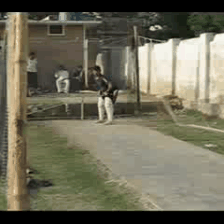

In [ ]:

def prepare_single_video(frames):
    frames = frames[None, ...]
    frame_mask = np.zeros(shape=(1, MAX_SEQ_LENGTH,), dtype="bool")
    frame_features = np.zeros(shape=(1, MAX_SEQ_LENGTH, NUM_FEATURES), dtype="float32")

    for i, batch in enumerate(frames):
        video_length = batch.shape[0]
        length = min(MAX_SEQ_LENGTH, video_length)
        for j in range(length):
            frame_features[i, j, :] = feature_extractor.predict(batch[None, j, :])
        frame_mask[i, :length] = 1  # 1 = not masked, 0 = masked

    return frame_features, frame_mask


def sequence_prediction(path):
    class_vocab = label_processor.get_vocabulary()

    frames = load_video(os.path.join("test", path))
    frame_features, frame_mask = prepare_single_video(frames)
    probabilities = sequence_model.predict([frame_features, frame_mask])[0]

    for i in np.argsort(probabilities)[::-1]:
        print(f"  {class_vocab[i]}: {probabilities[i] * 100:5.2f}%")
    return frames


# This utility is for visualization.
# Referenced from:
# https://www.tensorflow.org/hub/tutorials/action_recognition_with_tf_hub
def to_gif(images):
    converted_images = images.astype(np.uint8)
    imageio.mimsave("animation.gif", converted_images, fps=10)
    return embed.embed_file("animation.gif")


test_video = np.random.choice(test_df["video_name"].values.tolist())
print(f"Test video path: {test_video}")
test_frames = sequence_prediction(test_video)
to_gif(test_frames[:MAX_SEQ_LENGTH])